# Simple Fuctions To Find And Plot Support/Resistance Levels

## Sources
Most of this code comes from this article, I just changed it a bit to do what I wanted it to do and wrapped it into a few functions<br>
https://towardsdatascience.com/detection-of-price-support-and-resistance-levels-in-python-baedc44c34c9#:~:text=What%20are%20supports%20and%20resistances,has%20reached%20is%20called%20resistance.
<br>
<br>
mplfinance docs here: <br>
https://pypi.org/project/mplfinance/
<br>
<br>
From the docs: where data is a Pandas DataFrame object containing Open, High, Low and Close data, with a Pandas DatetimeIndex.


### Import Packages

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np

### Defining the get_levels() function
This finction takes in a df (with the above column names) and find the support/resistane levels
<br>
returns a list with the levels only

In [15]:
def get_levels(df):
    def isSupport(df,i):
        support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
        return support

    def isResistance(df,i):
        resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]
        return resistance

    s =  np.mean(df['High'] - df['Low'])
    def isFarFromLevel(l):
        return np.sum([abs(l-x) < s  for x in levels]) == 0

    levels = []
    for i in range(2,df.shape[0]-2):
        if isSupport(df,i):
            l = df['Low'][i]
            if isFarFromLevel(l):
                levels.append((l))
        elif isResistance(df,i):
            l = df['High'][i]
            if isFarFromLevel(l):
                levels.append((l))
    return levels

### Defining plot_candle()
Takes in the dataframe (with the above column names), the ticker name (for plot title), the timeframe (for plot title), and the list of levels you want to plot

In [18]:
def plot_candle(
    df: pd.DataFrame,
    ticker: str,
    timeframe: str,
    hlines_list: list = [0],
):
    if hlines_list[0] != 0:
        hlines = dict(hlines = hlines_list ,colors=['r'],linestyle='-',linewidths=1)
    elif hlines_list[0] == 0:
        hlines = dict(hlines = (df.iloc[0]['Open']) ,colors=['r'],linestyle='-',linewidths=0)

    kwargs = dict(type='candle',
        volume=False,
        figratio=(11,8),
        figscale=0.85,
        figsize=(13, 10)
        )
    mc = mpf.make_marketcolors(
        up='#337CFF',
        down='#E4AC3E',
        edge='inherit',
        wick = 'inherit',
        )
    s  = mpf.make_mpf_style(marketcolors=mc,
        gridaxis = 'horizontal',
        )
    fig, ax = mpf.plot(df,
        **kwargs,
        style=s, 
        ylabel = "Price",
        returnfig=True,
        hlines =  hlines,
        )
    fig.suptitle('{} {} {}'.format(df.index[0].date(),ticker,timeframe), 
        y=.95, 
        x=0.5,
        fontsize=15)
    plt.show()

### Example Using yfinance

Note that I do not use yfinance for my data

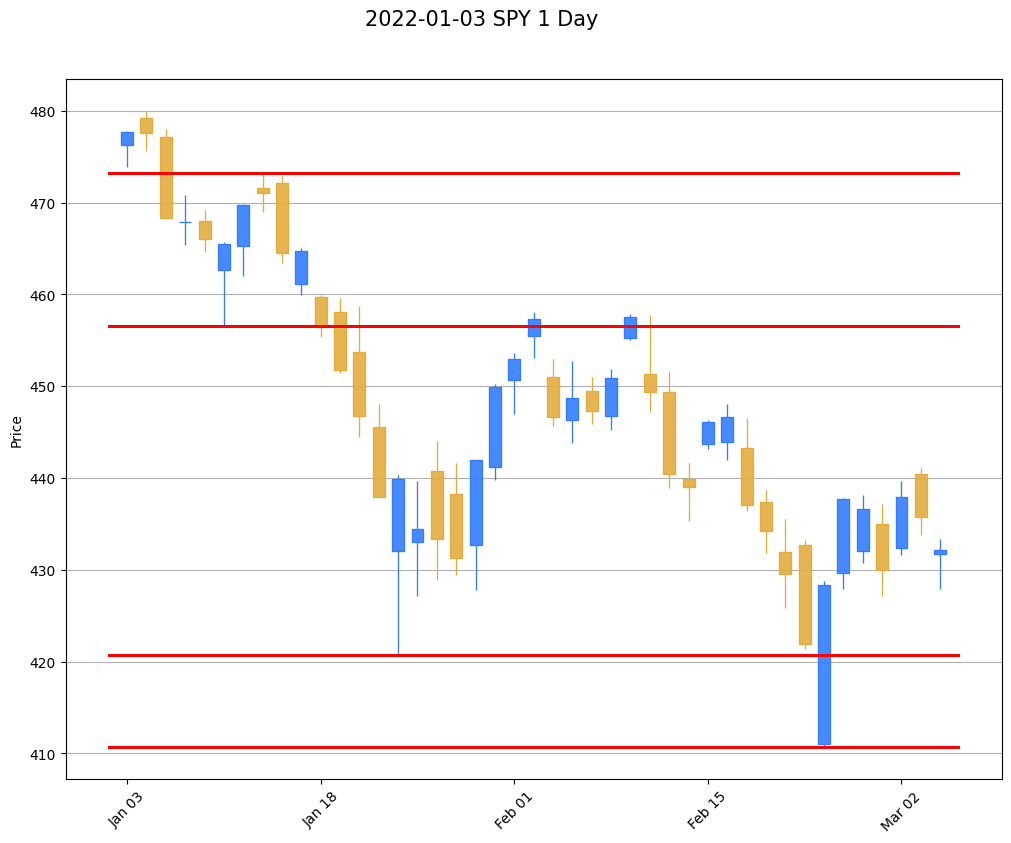

In [19]:
import yfinance as yf
import matplotlib.dates as mpl_dates

ticker = 'SPY'
timeframe = '1 Day'

df = yf.download(ticker, start='2022-01-01', threads= False, progress = False)
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]


levels = get_levels(df)
plot_candle(df,ticker, timeframe, levels)
